In [2]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
import matplotlib.colors as colors
from simulation import *
from viz import plot_slices_of_simulation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=0.001
p_prop=0.08
min_seed=20
r_grow=0.1
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 1900
max_ignite=0.001



params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite, 
                                rand_seed=12345)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()




forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree)

im = ax.imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))

def animate_func(i):
    global forest
    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)
    
    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = t_steps,
                               interval = 200, # in ms
                               )




<IPython.core.display.Javascript object>

TypeError: initialize_forest() missing 1 required positional argument: 'rng'

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\helen\OneDrive\Documents\modeling_complex_systems\QERM497_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in true_divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]


ValueError: unknown file extension: .mp4

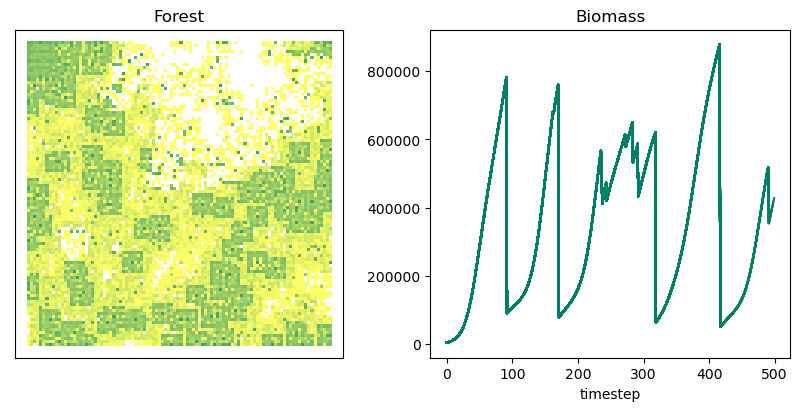

In [1]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.

import matplotlib.colors as colors
from simulation import *
from viz import plot_slices_of_simulation, theme_colors
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter


m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=0.001
p_prop=0.08
min_seed=20
r_grow=0.1
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 1900
max_ignite=0.001
rng=np.random.default_rng(12340)

params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite, 
                                rng=rng)


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), layout="constrained")


forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree, 
                            rng=rng)
formatter = ScalarFormatter()
formatter.set_scientific(True)

im = ax[0].imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))
im.set_cmap('summer_r')
ax[1].set_title("Biomass")
ax[1].set_xlabel("timestep")
ax[1].get_yaxis().set_major_formatter(formatter)
ax[0].set_title("Forest")
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
t,biomass = [],[]

counter = 0

def animate_func(i):
    global forest, counter

    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)

    t.append(i)
    biomass.append(np.sum(forest))
    ax[1].plot(t, biomass, color = theme_colors['green']) 

    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))

    counter =+ 1
    return [ax]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = t_steps,
                            interval = 50, # in ms
                            )
anim.save('westside.mp4')
plt.close()